# Phase 1: Data Loading & Initial Cleaning

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set_style("whitegrid")

In [4]:
#load dataset
file_path = 'Online Retail.xlsx'
df = pd.read_excel(file_path)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are 1,454 missing values in Descriptions and 135,080 missing CustomerIDs

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Phase 2: Data Cleaning and Preprocessing

In [15]:
df_cleaned = df.dropna(subset=['CustomerID'])
df_cleaned = df_cleaned.dropna(subset=['Description'])

 Removed sales records without a customer ID or product name, as they're not useful.

In [18]:
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

Filtered out invalid sales (zero quantity or zero price items)

In [19]:
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

Made sure customer IDs are recognized as whole numbers.

In [28]:
df_cleaned = df_cleaned.rename(columns={
    'CustomerID': 'grocery_id',
    'StockCode': 'product_id',
    'Description': 'product_name',
    'InvoiceDate': 'order_date',
    'InvoiceNo': 'order_id'
})

Renamed columns to be clearer and more relevant for understanding (e.g., 'CustomerID' to 'grocery_id')

In [30]:
df_cleaned['order_id'] = df_cleaned['order_id'].astype(str)

Ensured order IDs are treated as text, not numbers, to prevent issues.

In [31]:
df_cleaned.isnull().sum()

order_id        0
product_id      0
product_name    0
Quantity        0
order_date      0
UnitPrice       0
grocery_id      0
Country         0
dtype: int64

Confirmed all unwanted gaps in our data are now filled or removed.

In [32]:
df_cleaned.head()

,order_id,product_id,product_name,Quantity,order_date,UnitPrice,grocery_id,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      397884 non-null  object        
 1   product_id    397884 non-null  object        
 2   product_name  397884 non-null  object        
 3   Quantity      397884 non-null  int64         
 4   order_date    397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   grocery_id    397884 non-null  int32         
 7   Country       397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


397,884 entries, all columns are now non-null, and types are correct

In [34]:
df_cleaned['total_item_price'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

Calculated the total price for each item in an order.

In [35]:
df_cleaned['order_year'] = df_cleaned['order_date'].dt.year
df_cleaned['order_month'] = df_cleaned['order_date'].dt.month
df_cleaned['order_day_of_week'] = df_cleaned['order_date'].dt.dayofweek # Monday=0, Sunday=6
df_cleaned['order_hour'] = df_cleaned['order_date'].dt.hour
df_cleaned['order_day'] = df_cleaned['order_date'].dt.day

Extracted year, month, day, and hour from the order date for easier analysis.

In [36]:
df_cleaned.head()

,order_id,product_id,product_name,Quantity,order_date,UnitPrice,grocery_id,Country,total_item_price,order_year,order_month,order_day_of_week,order_hour,order_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2,8,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2,8,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1


In [37]:
df_cleaned['product_name'].value_counts().head(50)

WHITE HANGING HEART T-LIGHT HOLDER     2028
REGENCY CAKESTAND 3 TIER               1723
JUMBO BAG RED RETROSPOT                1618
ASSORTED COLOUR BIRD ORNAMENT          1408
PARTY BUNTING                          1396
LUNCH BAG RED RETROSPOT                1316
SET OF 3 CAKE TINS PANTRY DESIGN       1159
LUNCH BAG  BLACK SKULL.                1105
POSTAGE                                1099
PACK OF 72 RETROSPOT CAKE CASES        1068
PAPER CHAIN KIT 50'S CHRISTMAS         1019
SPOTTY BUNTING                         1017
LUNCH BAG SPACEBOY DESIGN              1008
LUNCH BAG CARS BLUE                     989
HEART OF WICKER SMALL                   985
NATURAL SLATE HEART CHALKBOARD          980
LUNCH BAG PINK POLKADOT                 957
REX CASH+CARRY JUMBO SHOPPER            952
LUNCH BAG SUKI DESIGN                   933
ALARM CLOCK BAKELIKE RED                899
LUNCH BAG APPLE DESIGN                  895
SET OF 4 PANTRY JELLY MOULDS            893
JUMBO BAG PINK POLKADOT         

Listed the 50 most frequently sold products.

In [40]:
def categorize_product(product_name):
    product_name = str(product_name).lower()

    if 'tea' in product_name or 'coffee' in product_name or 'mug' in product_name or 'cup' in product_name or 'water' in product_name or 'juice' in product_name or 'drink' in product_name or 'soda' in product_name:
        return 'Beverages & Hot Drinks'
    elif 'chocolate' in product_name or 'biscuit' in product_name or 'cake' in product_name or 'sweet' in product_name or 'candy' in product_name or 'cookie' in product_name or 'wafer' in product_name:
        return 'Snacks & Sweets'
    elif 'bag' in product_name or 'basket' in product_name or 'box' in product_name or 'storage' in product_name or 'tin' in product_name or 'container' in product_name or 'holder' in product_name:
        return 'Home & Storage'
    elif 'plate' in product_name or 'bowl' in product_name or 'dish' in product_name or 'kitchen' in product_name or 'glass' in product_name or 'cutlery' in product_name:
        return 'Kitchenware'
    elif 'candle' in product_name or 'light' in product_name or 'lamp' in product_name or 'decor' in product_name or 'frame' in product_name:
        return 'Home Decor & Lighting'
    elif 'soap' in product_name or 'wash' in product_name or 'clean' in product_name or 'brush' in product_name or 'sponge' in product_name:
        return 'Cleaning & Personal Care'
    elif 'toy' in product_name or 'game' in product_name or 'card' in product_name or 'jigsaw' in product_name:
        return 'Toys & Games'
    elif 'garden' in product_name or 'flower' in product_name or 'plant' in product_name:
        return 'Garden & Outdoor'
    elif 'door' in product_name or 'wall' in product_name or 'mirror' in product_name:
        return 'Home Fixtures'
    elif 'paper' in product_name or 'card' in product_name or 'envelope' in product_name or 'notebook' in product_name or 'pen' in product_name:
        return 'Stationery'
    elif 'jewel' in product_name or 'necklace' in product_name or 'earring' in product_name or 'bracelet' in product_name or 'ring' in product_name:
        return 'Jewellery'
    elif 'christmas' in product_name or 'xmas' in product_name or 'easter' in product_name:
        return 'Seasonal Items'
    elif 'bread' in product_name or 'flour' in product_name or 'rice' in product_name or 'pasta' in product_name or 'grain' in product_name or 'cereal' in product_name:
        return 'Grains & Pasta'
    elif 'milk' in product_name or 'cheese' in product_name or 'yogurt' in product_name or 'butter' in product_name:
        return 'Dairy Products'
    elif 'fruit' in product_name or 'vegetable' in product_name or 'fresh' in product_name:
        return 'Fresh Produce'
    elif 'canned' in product_name or 'jar' in product_name or 'tin' in product_name or 'soup' in product_name or 'sauce' in product_name:
        return 'Canned & Jarred Goods'
    elif 'spice' in product_name or 'oil' in product_name or 'vinegar' in product_name or 'salt' in product_name or 'sugar' in product_name:
        return 'Pantry Staples'
    elif 'baby' in product_name or 'child' in product_name or 'kid' in product_name:
        return 'Baby & Kids'

    return 'Other'

Created rules to group products into broader categories (e.g., 'Beverages & Hot Drinks')

In [41]:
df_cleaned['product_category'] = df_cleaned['product_name'].apply(categorize_product)

Applied those rules to add a new 'product_category' column for every item.

### Product category distribution:

In [44]:
print(df_cleaned['product_category'].value_counts())

Other                       114261
Home & Storage               90996
Beverages & Hot Drinks       32415
Snacks & Sweets              31060
Home Decor & Lighting        27800
Kitchenware                  17718
Stationery                   17053
Home Fixtures                14403
Toys & Games                 13196
Seasonal Items               12219
Garden & Outdoor              7939
Jewellery                     4485
Baby & Kids                   3597
Dairy Products                3082
Pantry Staples                2309
Cleaning & Personal Care      2056
Canned & Jarred Goods         1931
Grains & Pasta                1152
Fresh Produce                  212
Name: product_category, dtype: int64


Counted how many items fall into each new product category.

In [47]:
df_cleaned.head()

,order_id,product_id,product_name,Quantity,order_date,UnitPrice,grocery_id,Country,total_item_price,order_year,order_month,order_day_of_week,order_hour,order_day,product_category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2,8,1,Home & Storage
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1,Other
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2,8,1,Beverages & Hot Drinks
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1,Beverages & Hot Drinks
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2,8,1,Other


In [48]:
df_cleaned = df_cleaned[[
    'order_id', 'order_date', 'order_year', 'order_month', 'order_day', 'order_day_of_week', 'order_hour',
    'grocery_id', 'Country',
    'product_id', 'product_name', 'product_category', 'Quantity', 'UnitPrice', 'total_item_price'
]]

Reorganized and selected only the most important columns for our analysis.

In [49]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   order_id           397884 non-null  object        
 1   order_date         397884 non-null  datetime64[ns]
 2   order_year         397884 non-null  int64         
 3   order_month        397884 non-null  int64         
 4   order_day          397884 non-null  int64         
 5   order_day_of_week  397884 non-null  int64         
 6   order_hour         397884 non-null  int64         
 7   grocery_id         397884 non-null  int32         
 8   Country            397884 non-null  object        
 9   product_id         397884 non-null  object        
 10  product_name       397884 non-null  object        
 11  product_category   397884 non-null  object        
 12  Quantity           397884 non-null  int64         
 13  UnitPrice          397884 non-null  float64 

In [50]:
df_cleaned.head()

,order_id,order_date,order_year,order_month,order_day,order_day_of_week,order_hour,grocery_id,Country,product_id,product_name,product_category,Quantity,UnitPrice,total_item_price
0,536365,2010-12-01 08:26:00,2010,12,1,2,8,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,Home & Storage,6,2.55,15.30
1,536365,2010-12-01 08:26:00,2010,12,1,2,8,17850,United Kingdom,71053,WHITE METAL LANTERN,Other,6,3.39,20.34
2,536365,2010-12-01 08:26:00,2010,12,1,2,8,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,Beverages & Hot Drinks,8,2.75,22.00
3,536365,2010-12-01 08:26:00,2010,12,1,2,8,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,Beverages & Hot Drinks,6,3.39,20.34
4,536365,2010-12-01 08:26:00,2010,12,1,2,8,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,Other,6,3.39,20.34


In [52]:
df_cleaned.to_csv('online_retail_cleaned.csv', index=False)

Cleaned DataFrame saved to 'online_retail_cleaned_original_country.csv'

# Phase 3: Exploratory Data Analysis (EDA)

### Key Areas for EDA:

1.  **Overall Sales Performance:**
    *   Total Sales (Revenue) over time.
    *   Number of Orders and Unique Groceries over time.

2.  **Product Analysis:**
    *   Top-selling products (by quantity and revenue).
    *   Top-performing product categories.

3.  **Customer (Grocery) Analysis:**
    *   Distribution of orders/revenue per grocery.
    *   Most active groceries.

4.  **Time-based Analysis:**
    *   Sales trends by year, month, day of week, and hour of day.
    *   Seasonality.

5.  **Geographical Analysis:**
    *   Sales distribution across different countries.
    *   Top performing countries.

## 1. Overall Sales Performance

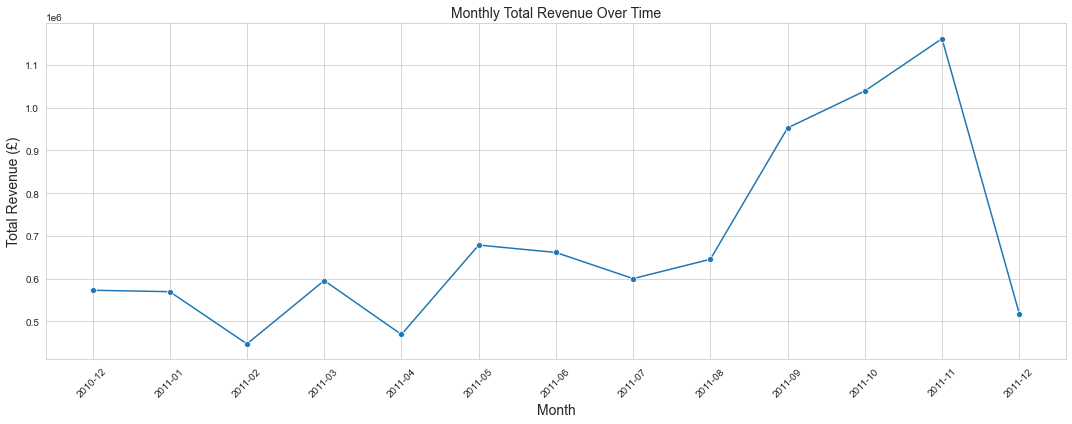

In [78]:
monthly_revenue = df_cleaned.groupby(['order_year', 'order_month'])['total_item_price'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['order_year'].astype(str) + '-' + monthly_revenue['order_month'].astype(str).str.zfill(2)
monthly_revenue = monthly_revenue.sort_values(by='year_month')

plt.figure(figsize=(15, 6))
sns.lineplot(x='year_month', y='total_item_price', data=monthly_revenue, marker='o')
plt.title('Monthly Total Revenue Over Time', fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Total Revenue (£)', fontsize = 14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Monthly revenue fluctuated, showing a clear upward trend peaking in November before a sharp December drop.


## 2. Product Analysis

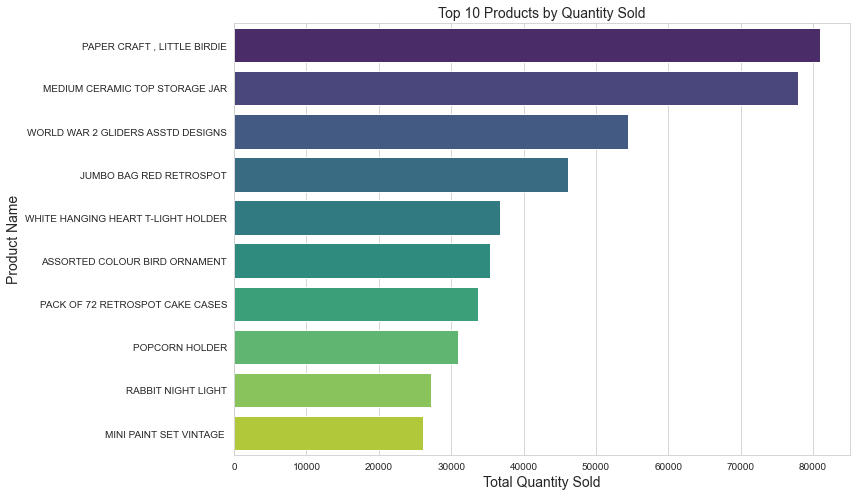

In [80]:
top_products_quantity = df_cleaned.groupby('product_name')['Quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='Quantity', y='product_name', data=top_products_quantity, palette='viridis')
plt.title('Top 10 Products by Quantity Sold', fontsize = 14)
plt.xlabel('Total Quantity Sold', fontsize = 14)
plt.ylabel('Product Name', fontsize = 14)
plt.tight_layout()

plt.show()

The 'PAPER CRAFT LITTLE BIRDIE' product sold the highest quantity, significantly more than others.

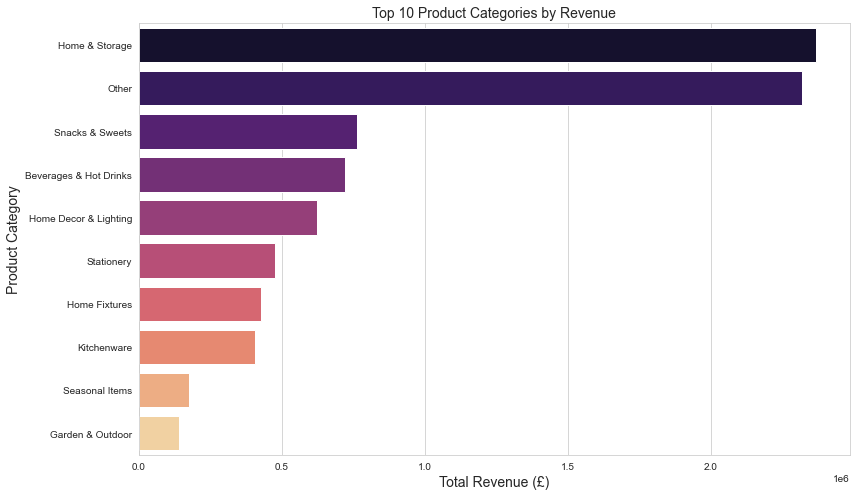

In [83]:
top_categories_revenue = df_cleaned.groupby('product_category')['total_item_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='total_item_price', y='product_category', data=top_categories_revenue, palette='magma')
plt.title('Top 10 Product Categories by Revenue', fontsize = 14)
plt.xlabel('Total Revenue (£)', fontsize = 14)
plt.ylabel('Product Category', fontsize = 14)
plt.tight_layout()

plt.show()

'Home & Storage' and the 'Other' category generate the most revenue for the dataset.

## 3. Customer (Grocery) Analysis

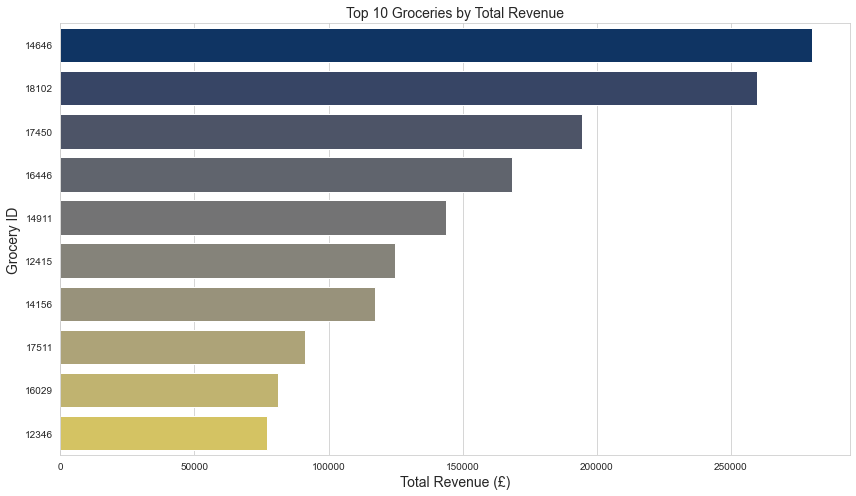

In [86]:
top_groceries_revenue = df_cleaned.groupby('grocery_id')['total_item_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='total_item_price', y='grocery_id', data=top_groceries_revenue.astype({'grocery_id': 'str'}), palette='cividis')
plt.title('Top 10 Groceries by Total Revenue', fontsize = 14)
plt.xlabel('Total Revenue (£)', fontsize = 14)
plt.ylabel('Grocery ID', fontsize = 14)
plt.tight_layout()

plt.show()

Visualized the customer accounts with the highest total spending, Customer ID 14646 is the highest revenue-generating customer by a notable margin.

## 4. Time-based Analysis

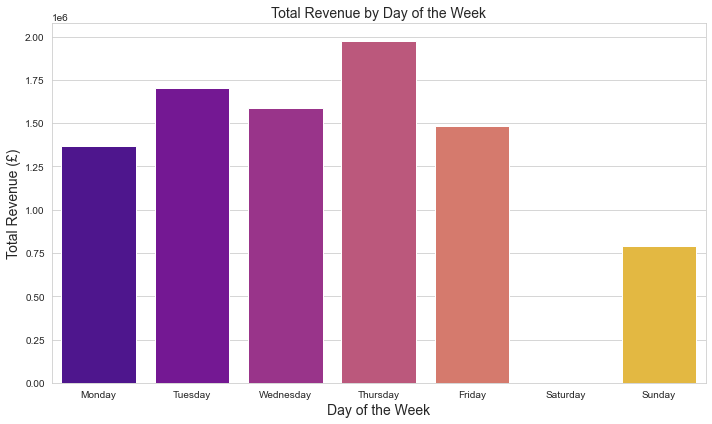

In [89]:
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = df_cleaned.groupby('order_day_of_week')['total_item_price'].sum().reindex(range(7)).reset_index()
sales_by_day['Day'] = sales_by_day['order_day_of_week'].map(lambda x: day_names[x])

plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='total_item_price', data=sales_by_day, palette='plasma')
plt.title('Total Revenue by Day of the Week', fontsize = 14)
plt.xlabel('Day of the Week', fontsize = 14)
plt.ylabel('Total Revenue (£)', fontsize = 14)
plt.tight_layout()

plt.show()

Calculated total sales for each day of the week, Thursday and Tuesday are the highest revenue days, while Saturday and Sunday show significantly lower sales.

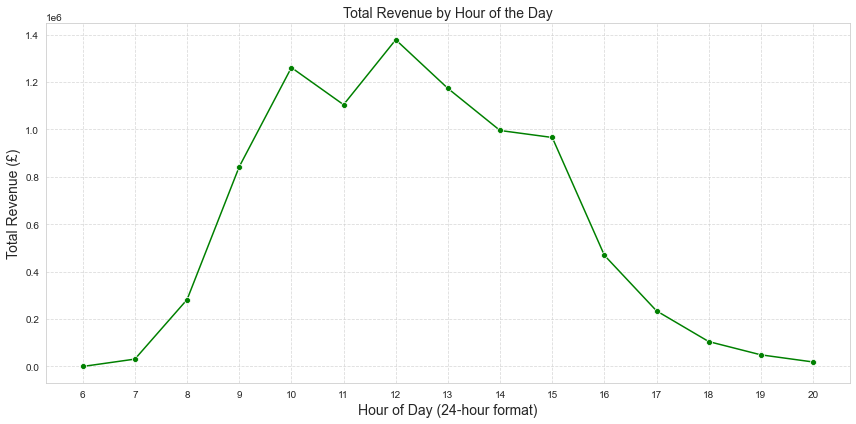

In [92]:
sales_by_hour = df_cleaned.groupby('order_hour')['total_item_price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour', y='total_item_price', data=sales_by_hour, marker='o', color='green')
plt.title('Total Revenue by Hour of the Day', fontsize = 14)
plt.xlabel('Hour of Day (24-hour format)', fontsize = 14)
plt.ylabel('Total Revenue (£)', fontsize = 14)
plt.xticks(range(df_cleaned['order_hour'].min(), df_cleaned['order_hour'].max() + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Visualized the busiest hours for sales throughout the day, Sales revenue steadily rises from morning, peaks around noon (12 PM), then declines through the afternoon.

## 5. Geographical Analysis

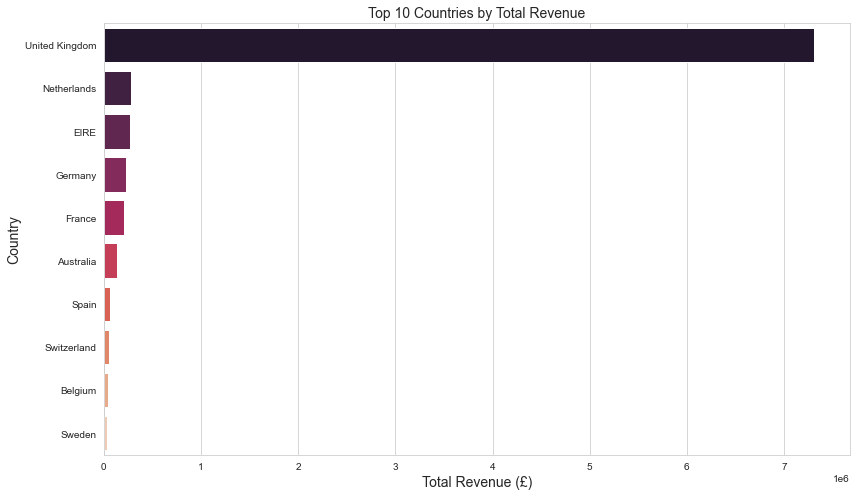

In [97]:
top_countries_revenue = df_cleaned.groupby('Country')['total_item_price'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='total_item_price', y='Country', data=top_countries_revenue, palette='rocket')
plt.title('Top 10 Countries by Total Revenue', fontsize = 14)
plt.xlabel('Total Revenue (£)', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.tight_layout()

plt.show()

Visualized which countries contribute most to overall sales, The United Kingdom generates overwhelmingly more revenue than any other country in this dataset.

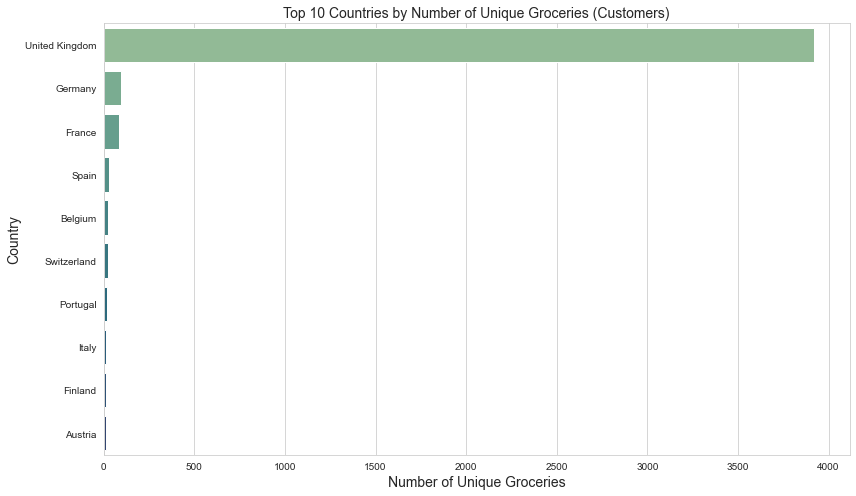

In [99]:
top_countries_customers = df_cleaned.groupby('Country')['grocery_id'].nunique().nlargest(10).reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='grocery_id', y='Country', data=top_countries_customers, palette='crest')
plt.title('Top 10 Countries by Number of Unique Groceries (Customers)', fontsize = 14)
plt.xlabel('Number of Unique Groceries', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.tight_layout()

plt.show()

Visualized which countries have the highest number of unique customer accounts, The United Kingdom also has significantly more unique customers compared to all other countries.

# Phase 4: Basic Sales Forecasting

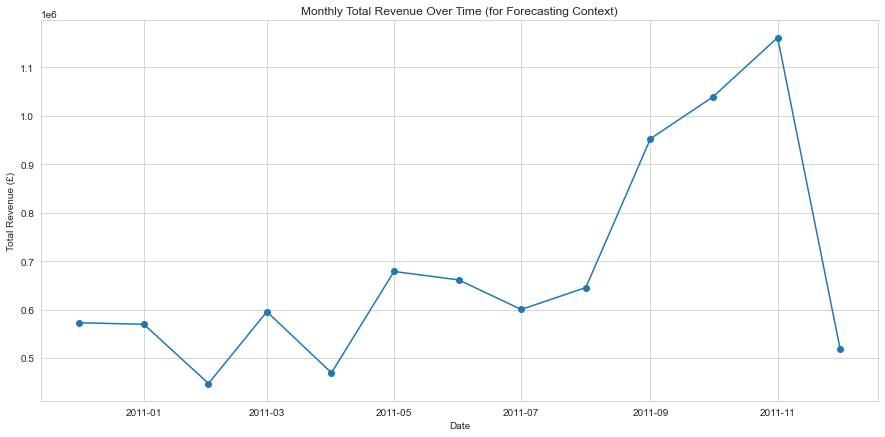

In [100]:
monthly_sales = df_cleaned.groupby(['order_year', 'order_month'])['total_item_price'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales['order_year'].astype(str) + '-' + monthly_sales['order_month'].astype(str) + '-01')
monthly_sales = monthly_sales.sort_values('Date').set_index('Date')

plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales['total_item_price'], marker='o')
plt.title('Monthly Total Revenue Over Time (for Forecasting Context)')
plt.xlabel('Date')
plt.ylabel('Total Revenue (£)')
plt.grid(True)

plt.show()

- This plot visualizes monthly sales trends (e.g., growth, decline) and seasonality (e.g., peak months, slow periods).
- This foundational understanding is essential before any forecasting can begin, providing a clear picture of historical business activity.

In [120]:
print("\nMonthly Sales Data:")
monthly_sales.tail()


Monthly Sales Data:


,order_year,order_month,total_item_price
Date,,,
2011-08-01,2011,8,645343.900
2011-09-01,2011,9,952838.382
2011-10-01,2011,10,1039318.790
2011-11-01,2011,11,1161817.380
2011-12-01,2011,12,518192.790


- Recognizing our limited 13-month sales history, iI've decided to focus on visualizing past trends and discussing how a simpler forecast could be made (e.g., using previous year's data or recent averages adjusted for seasonality). This pragmatic strategy ensures our predictions are understandable and dependable, avoiding overly complex models that might be unreliable with the available data, while still demonstrating a clear understanding of forecasting principles.

# Phase 5: Product Recommendation System

In [110]:
basket = df_cleaned.groupby('order_id')['product_name'].apply(list).reset_index()

co_occurrence_counts = {}
for products_in_order in basket['product_name']:
    # Get unique products in the current order to avoid self-pairing and duplicate pairs from same product multiple quantities
    unique_products_in_order = list(set(products_in_order))
    for item1, item2 in combinations(unique_products_in_order, 2):
        # Sort items to treat (A, B) and (B, A) as the same pair
        pair = tuple(sorted((item1, item2)))
        co_occurrence_counts[pair] = co_occurrence_counts.get(pair, 0) + 1

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Product_Pair', 'Count'])
co_occurrence_df[['Product1', 'Product2']] = pd.DataFrame(co_occurrence_df['Product_Pair'].tolist(), index=co_occurrence_df.index)
co_occurrence_df = co_occurrence_df.sort_values(by='Count', ascending=False).drop('Product_Pair', axis=1)

print("\nTop 10 Most Frequently Co-occurring Product Pairs:")
co_occurrence_df.head(10)



Top 10 Most Frequently Co-occurring Product Pairs:


,Count,Product1,Product2
10731,546,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT
31437,541,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER
221,530,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED
3807,523,LUNCH BAG PINK POLKADOT,LUNCH BAG RED RETROSPOT
7804,517,LUNCH BAG BLACK SKULL.,LUNCH BAG RED RETROSPOT
334,468,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH
2956,467,LUNCH BAG RED RETROSPOT,LUNCH BAG SPACEBOY DESIGN
40804,464,LUNCH BAG BLACK SKULL.,LUNCH BAG PINK POLKADOT
986208,463,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM
172481,460,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER


- This step Uncovers customer purchasing habits, by identifying the Top 10 Most Frequently Co-occurring Product Pairs, we gain direct insight into which products customers naturally buy together. 
- This information is invaluable for strategic product placement, creating attractive bundles, and forming the basis for highly effective recommendation systems, ultimately boosting average order value.

In [122]:
def recommend_products(product_name, co_occurrence_df, top_n=5):
    recommendations = {}

    relevant_pairs = co_occurrence_df[(co_occurrence_df['Product1'].str.contains(product_name, case=False, na=False)) |
                                      (co_occurrence_df['Product2'].str.contains(product_name, case=False, na=False))]

    for index, row in relevant_pairs.iterrows():
        if product_name.lower() in row['Product1'].lower():
            other_product = row['Product2']
        else:
            other_product = row['Product1']
        
        recommendations[other_product] = recommendations.get(other_product, 0) + row['Count']

    sorted_recommendations = sorted(recommendations.items(), key=lambda item: item[1], reverse=True)

    if sorted_recommendations:
        print(f"\nIf a grocery buys '{product_name}', they might also be interested in:")
        for i, (prod, count) in enumerate(sorted_recommendations[:top_n]):
            print(f"- {prod} (co-occurred {count} times)")
    else:
        print(f"\nNo specific recommendations found for '{product_name}' based on co-occurrence.")


example_product_1 = 'JUMBO BAG RED RETROSPOT'
recommend_products(example_product_1, co_occurrence_df)

example_product_2 = 'WHITE HANGING HEART T-LIGHT HOLDER'
recommend_products(example_product_2, co_occurrence_df)

example_product_3 = 'ASSORTED COLOURS SILK FAN'
recommend_products(example_product_3, co_occurrence_df)

example_product_4 = 'VICTORIAN GLASS HANGING T-LIGHT'
recommend_products(example_product_4, co_occurrence_df)



If a grocery buys 'JUMBO BAG RED RETROSPOT', they might also be interested in:
- JUMBO BAG PINK POLKADOT (co-occurred 546 times)
- JUMBO STORAGE BAG SUKI (co-occurred 434 times)
- LUNCH BAG RED RETROSPOT (co-occurred 425 times)
- JUMBO BAG STRAWBERRY (co-occurred 414 times)
- JUMBO SHOPPER VINTAGE RED PAISLEY (co-occurred 396 times)

If a grocery buys 'WHITE HANGING HEART T-LIGHT HOLDER', they might also be interested in:
- RED HANGING HEART T-LIGHT HOLDER (co-occurred 455 times)
- WOODEN PICTURE FRAME WHITE FINISH (co-occurred 308 times)
- HEART OF WICKER LARGE (co-occurred 290 times)
- PARTY BUNTING (co-occurred 279 times)
- ASSORTED COLOUR BIRD ORNAMENT (co-occurred 271 times)

If a grocery buys 'ASSORTED COLOURS SILK FAN', they might also be interested in:
- PARTY BUNTING (co-occurred 46 times)
- LUNCH BAG RED RETROSPOT (co-occurred 42 times)
- WHITE HANGING HEART T-LIGHT HOLDER (co-occurred 39 times)
- REGENCY CAKESTAND 3 TIER (co-occurred 39 times)
- LUNCH BAG  BLACK SKULL. (co-

- This final step operationalizes our co-occurrence insights into tangible business value.
- It demonstrates how to leverage the identified product pairs to generate targeted recommendations. This capability is crucial for enhancing the customer shopping experience, driving incremental sales through personalized suggestions, and improving overall customer engagement by making relevant product discovery effortless.